In [26]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [27]:
import os
rootdir = './MEAN_Satility/'
list = os.listdir(rootdir) #列出文件夹下所有的目录与文件

In [4]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
S_ss = ds['ss'][0, 0]
for i in range(1,len(list)):
    try:
        ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    except:
        continue
    S_ss = S_ss + ds['ss'][0, 0]
S_ss = S_ss/len(list)

In [5]:
ctrl_ss = np.loadtxt('Ctrl_86-90SSS.csv',delimiter=',')
ctrl_ss

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [31.82976341, 31.91702271, 31.99611664, ..., 31.737854  ,
        31.82976341, 31.91702271],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [7]:
sali = S_ss - ctrl_ss
sali

<xarray.DataArray 'ss' (lat: 115, lon: 182)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.00027275, -0.00041008, -0.0001812 , ..., -0.00014305,
        -0.00027275, -0.00041008],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -72.0 -74.0 -76.0 -78.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 354.0 356.0 358.0 360.0 362.0
    lev      float32 -5.0

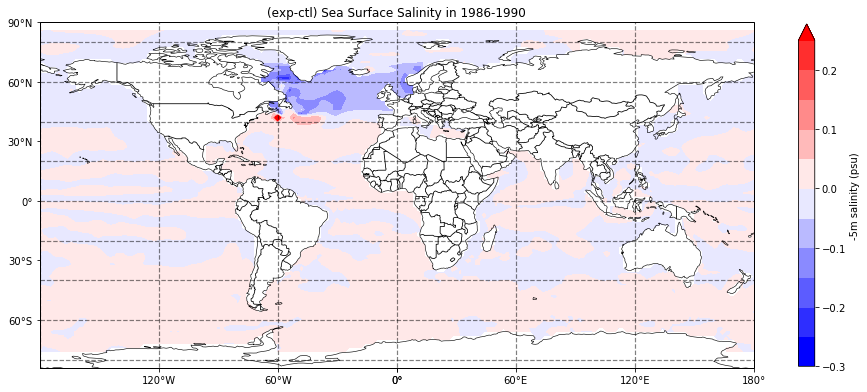

In [12]:
# 创建画图空间
proj = ccrs.PlateCarree(central_longitude=0)  #创建投影
fig = plt.figure(figsize=(16,9))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': '-5m salinity (psu)',
   'shrink': 0.7,
   'ticks': np.arange(-0.3,0.3,0.1)
}
levels = np.arange(-0.3,0.3,0.05)
sali.plot.contourf(ax=ax, levels=levels, cmap='bwr', 
    cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
ax.set_title("(exp-ctl) Sea Surface Salinity in 1986-1990")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('delSSS_8690.png')
fig.show()

# Meridional overturning circulation psi

In [14]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
psi = ds['psi'][0]
for i in range(1,len(list)):
    ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    psi = psi + ds['psi'][0]
Exp_psi = psi/len(list)

In [15]:
ctrl_psi = np.loadtxt('Ctrl_86-90psi.csv',delimiter=',')
ctrl_psi

array([[        nan,         nan,  0.        , ...,  0.        ,
         0.        ,         nan],
       [        nan,         nan, -0.10845009, ..., -0.0646308 ,
         0.        ,         nan],
       [        nan,         nan, -0.11010699, ..., -0.14610104,
         0.        ,         nan],
       ...,
       [        nan,         nan,  0.04705823, ..., -0.00075439,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [22]:
psi = Exp_psi - ctrl_psi
psi.coords['lat'].attrs['units'] = ''
psi.coords['lev1'].attrs['units'] = 'm'
psi

<xarray.DataArray 'psi' (lev1: 31, lat: 115)>
array([[            nan,             nan,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,             nan],
       [            nan,             nan,  9.14693769e-06, ...,
         1.06693319e-04,  0.00000000e+00,             nan],
       [            nan,             nan,  2.35589945e-05, ...,
         2.13218087e-04,  0.00000000e+00,             nan],
       ...,
       [            nan,             nan, -5.68819898e-04, ...,
        -2.16587708e-04,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])
Coordinates:
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -72.0 -74.0 -76.0 -78.0
  * lev1     (lev1) float32 0.0 -10.0 -20.0 ... -4189.6616 -4887.194 -5600.0

In [23]:
psi.coords['lat'] = psi.coords['lat'][::-1]  #逆序
#重新构造
new = psi.values
lev = psi.coords['lev1'].values
lat = psi.coords['lat'].values
lat1=lat.copy()
lat = lat1[::-1]
lat=lat*-1
newpsi = xr.DataArray(new,coords=[lev,lat],dims=['Depth','Latitude'])

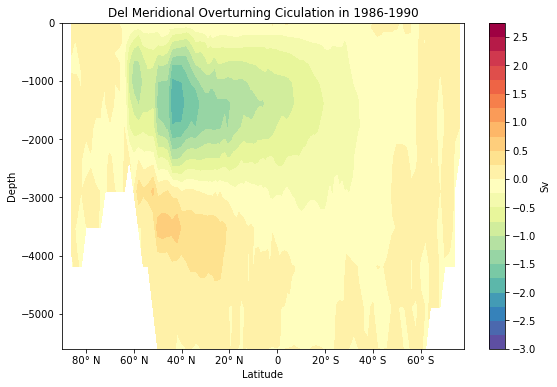

In [25]:
#plot
fig, ax = plt.subplots(figsize=(9,6))
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'Sv',
  # 'shrink': 0.8,
   'ticks': np.arange(-3,3,0.5)
}
levels = np.arange(-3,3,0.25)
newpsi.plot.contourf(ax=ax, levels=levels,cbar_kwargs=cbar_kwargs, cmap='Spectral_r')
#cs = ax.contourf(LAT, LEV, ver_Temp, levels=levels, cmap='Spectral_r')
#cbar = fig.colorbar(cs)
ax.set_title("Del Meridional Overturning Ciculation in 1986-1990")  # Add a title to the axes.
tick = ['0','80° N','60° N','40° N','20° N','0','20° S','40° S','60° S']
ax.set_xticklabels(tick)
plt.savefig('delpsi_8690.png')

In [28]:
#make Ctrl_Temp ready
ctrl_temp = np.loadtxt('../Ctrl_86-90Temp.csv',delimiter=',')
lon = ds['ts'].coords['lon'].values #182 (0,362,2) !!!! 2,362
lat = ds['ts'].coords['lat'].values #115 (90,-78,2)
lev = ds['ts'].coords['lev'].values #115 (90,-78,2)

In [29]:
temp = ds['ts'][0, 0]
for i in range(1,len(list)):
    try:
        ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    except:
        continue
    temp = temp + ds['ts'][0, 0]
temp = temp/len(list)

In [30]:
dtemp =  temp.values - ctrl_temp
Dtemp = xr.DataArray(dtemp,coords=[lat,lon],dims=['Latitude','Longetide'])

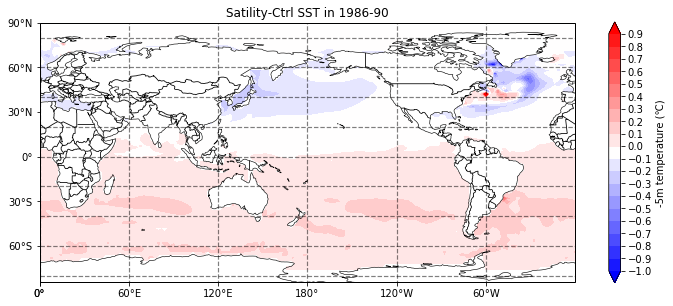

In [34]:
proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(12,8))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': '-5m temperature (℃)',
   'shrink': 0.6,
   'ticks': np.arange(-1,1,0.1)
}
levels = np.arange(-1,1,0.1)
Dtemp.plot.contourf(ax=ax, levels=levels, cmap='bwr', #Spectral_r  vlag   RdYlBu_r
    cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
ax.set_title("Satility-Ctrl SST in 1986-90")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('delSST86-90.png')
fig.show()